In [1]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.1 MB/s eta 0:00:00


In [57]:
import os
import cv2
from ultralytics import YOLO
from roboflow import Roboflow
import matplotlib.pyplot as plt

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("youssef-elsheikh-pqoup").project("facial-emotion-recognition-hnujs")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-emotion-recognition-1 in yolov8:: 100%|██████████| 19764/19764 [00:07<00:00, 2800.41it/s]


In [4]:
print(dataset.location)

/content/Facial-emotion-recognition-1


In [5]:
yaml_content = """
test: /content/Facial-emotion-recognition-1/test
train: /content/Facial-emotion-recognition-1/train
val: /content/Facial-emotion-recognition-1/valid

nc: 4
names:
  - angry
  - happy
  - sad
  - surprised
"""

with open('/content/Facial-emotion-recognition-1/data.yaml', 'w') as f:
    f.write(yaml_content)

In [58]:
fine_model = YOLO('yolo11n.pt')
normal_model = YOLO('yolo11n.pt')
transfer_model = YOLO('yolo11n.pt')

In [59]:
fine_results = fine_model.train(data='/content/Facial-emotion-recognition-1/data.yaml', epochs=1, patience=5 , project='Facial Emotion Fine-tune', name='logs', device=[0])

Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Facial-emotion-recognition-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=logs, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0

In [60]:
transfer_results = transfer_model.train(data='/content/Facial-emotion-recognition-1/data.yaml', epochs=1 , project='Facial Emotion transfer', name='logs', device=[0] , freeze="backbone")

Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Facial-emotion-recognition-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=backbone, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=logs2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

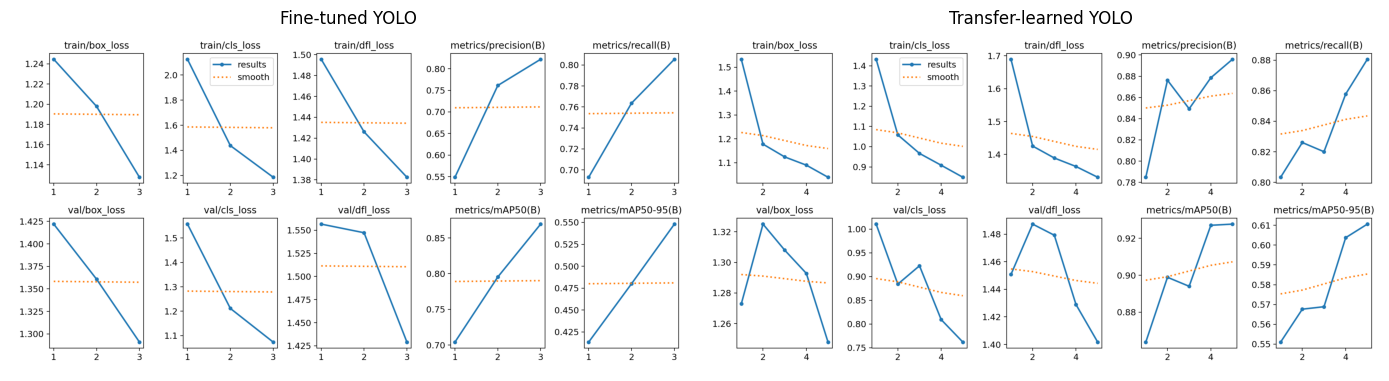

In [74]:
import cv2
import matplotlib.pyplot as plt

# Load images
img_fine = cv2.imread("Facial Emotion/logs/results.png")
img_transfer = cv2.imread("Facial Emotion transfer/logs/results.png")

# Convert BGR to RGB
img_fine = cv2.cvtColor(img_fine, cv2.COLOR_BGR2RGB)
img_transfer = cv2.cvtColor(img_transfer, cv2.COLOR_BGR2RGB)

# Create side-by-side plot
plt.figure(figsize=(14,6))  # width x height

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.imshow(img_fine)
plt.axis("off")
plt.title("Fine-tuned YOLO")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.imshow(img_transfer)
plt.axis("off")
plt.title("Transfer-learned YOLO")

plt.tight_layout()
plt.show()
